# Quality Analysis: Signal versus Control

A negative control should be included especially when dealing with small samples. Contamination from extracellular proteins, bleed over from other channels in TMT runs, and general noise readings might be negligible when dealing with large samples but particularly as the sample size nears the capability of the machine to detect, it becomes necessary to separate detected signals that truly represent the sample from the low level noise.

This notebook takes the protein groups identified by MaxQuant in a tab deliminated text file with columns of reporter intensity. Though the program was designed for TMT runs, if using LFQ runs would be compared rather than reporters. We then generate a ROC-like curve, showing how much the sample or control data is included with any given threshold.

<img src=./figures/ex_curve.jpg width="500">

As we lower the threshold, more of each is included until finally all of the non-zero data is. Graphically, this means the curve starts with 0,0 in the lower left corner and proceeds to the top right corner.

Ideally the sample data has a stronger signal than the negative control. This is shown on the graphs by how close to the top left corner the curve comes. A perfect run would look like the green line.

If the sample signals are no stronger than the negative control, the graph would show a straight line from corner to corner. This is demonstrated in yellow. If the samples were less intense than the negative control, the curve would approach the bottom right corner. 

***

### Imports
First we import our functions module. This includes importing the dependencies such as pandas and pyplot.

In [1]:
import nbimporter
%run ms_functions.ipynb

### nanoPOTS Data
Here we use single-cell volume MS3 data generated using the nanoPOTS method.

Calling the <code>readin</code> function on the file returns a dataframe of the information.

In [2]:
file = "data/proteinGroups_MS3_simplified.txt"
data = readin(file)

Graphs are then generated using python's pyplot and custom functions defined in the <code>ms_functions</code> file.

Here we set the title, call our <code>ROC_all</code> function, and show the plot. The two required parameters are a dataframe and the column ID for the negative control. We also pass in the boost column, which graphs the curve for the boost in blue.


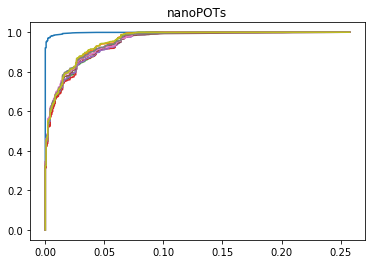

In [3]:
plt.title('nanoPOTs')
ROC_all(data, 7, boost=9)
plt.show()

Every line indicates a channel. We see that the blue boost is clearly stronger than the samples and that the samples are close in quality.

As you can see, the plot above scaled the curves to the total signals. This allows them to be compared clearly and allows thresholds to be identified. For example, if we include 5% of the negative control here, we will also include all the boost and about 95% of sample data. If instead of a fraction, you prefer the data be graphed in terms of identified proteins, you can use the keyword argument <code>as_fraction=False</code>

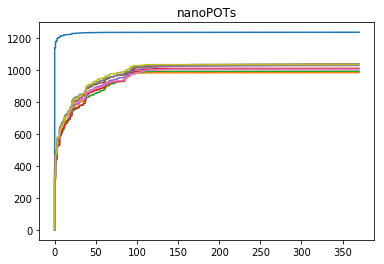

In [4]:
plt.title('nanoPOTs')
ROC_all(data, 7, boost=9, as_fraction=False)
plt.show()

Here we see that our boost channel, shown in dark blue, identified about 200 more proteins than did the sample channels. 

We can also combine the data from samples by defining a dictionary of sample groups. These groups might be replicates as defined in your experimental design but should generally exclude controls. In this notebook, we will use two groups. One will be all samples. This excludes the controls and gives a general overview. The second is the first channel, again excluding controls. We will use this later on. After defining this dictionary, we pass it to the <code>ROC_plot</code> function with the name of the group we wish to plot.

In [5]:
nanoPots_samples = {
    "First channel":[0],
    "All samples":[0,1,2,3,4,5,6,8]
}
nanoPOTs = ROC_plot(data, 7, nanoPots_samples, "All samples")

We now have the coordinates for the plot and can display it using standard pyplot commands.

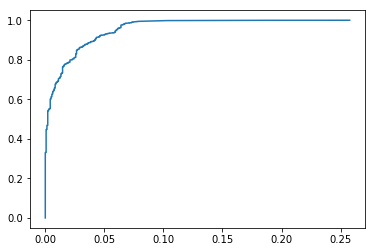

In [6]:
plt.plot(nanoPOTs.values(), nanoPOTs.keys(), label="nanoPOTs")
plt.show()

### nanoWELLS and SCoPE-MS
Using the same functions we can graph multiple runs to compare them.

Here we also compare preparation methods by using data from the nanoPOTS, its precurser nanoWELLS, SCoPE-MS, and the recent SCoPE2 methods.

___

Beginning with nanoWELLS, we define the sample groups, again for the first channel and for all samples, and read in the data.

In [7]:
NanoWell_samples = {
    "First channel":[0],
    "All samples":[0,1,2,3,4,5,6,8]
}

file = "data/proteinGroups_nanoWELLS_run3_simplified.txt"
data0_3 = readin(file)
NanoWell_3= ROC_plot(data0_3, 9, NanoWell_samples,"All samples")

We then repeat the process for the other two methods, using a file or two from each paper.

In [8]:
file = "data/proteinGroups_SCoPE-MS_simplified.txt"
SCoPE_MS_data = readin(file)

SCoPE_MS_samples = {
    "First channel":[0],
    "All Samples":[0,1,2,3,4,5,6,8]
}
SCoPE_MS = ROC_plot(SCoPE_MS_data, 7, SCoPE_MS_samples, "All Samples")

In [9]:
file = "data/proteinGroups_Slavov_simplified.txt"
SCoPE_MS_data1 = readin(file)

SCoPE_MS_samples1 = {
    "First channel":[0],
    "All Samples":[0,1,2,3,4,5,6,8]
}
SCoPE_MS1 = ROC_plot(SCoPE_MS_data1, 7, SCoPE_MS_samples1, "All Samples")

In [10]:
file = "data/proteinGroups_SCoPE2_simplified.txt"
SCoPE2_data = readin(file)

SCoPE2_samples = {
    "First channel":[3],
    "All Samples":[3,5,6,8,9]
}
SCoPE2 = ROC_plot(SCoPE2_data, 7, SCoPE2_samples, "All Samples")

Now we plot the various methods against each other.

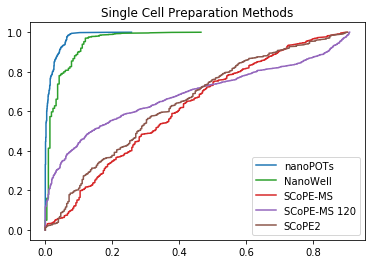

In [11]:
plt.title('Single Cell Preparation Methods')
plt.plot(nanoPOTs.values(), nanoPOTs.keys(), label="nanoPOTs")
plt.plot(0,0) #shift the automatic colors
plt.plot(NanoWell_3.values(), NanoWell_3.keys(), label="NanoWell")
plt.plot(SCoPE_MS.values(), SCoPE_MS.keys(), label="SCoPE-MS")
plt.plot(SCoPE_MS1.values(), SCoPE_MS1.keys(), label="SCoPE-MS 120")
plt.plot(SCoPE2.values(), SCoPE2.keys(), label="SCoPE2")
plt.legend(loc='lower right')
plt.show()

Or we can just plot a couple for a more clear comparison.

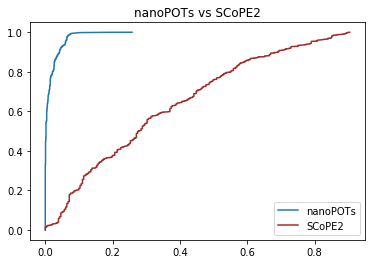

In [12]:
plt.title("nanoPOTs vs SCoPE2")
plt.plot(nanoPOTs.values(), nanoPOTs.keys(), label="nanoPOTs")
plt.plot(SCoPE2.values(), SCoPE2.keys(), label="SCoPE2",color='brown')
plt.legend(loc='lower right')
plt.show()

The above graphs show the curves relative to total number of proteins, but it may also be interesting to see the total number of proteins. Comparing the number identified in a single channel allows this. Note that this number may vary somewhat between channels as might the signal strength. Here the first sample channel is used from each.

To compare the number of proteins, we again use the keyword argument <code>as_fraction=False</code> and the first channel data.

In [13]:
nanoPOTs_raw = ROC_plot(data, 7, nanoPots_samples, "First channel", as_fraction=False)
NanoWell_3_raw= ROC_plot(data0_3, 9, NanoWell_samples, "First channel", as_fraction=False)
SCoPE_MS_raw = ROC_plot(SCoPE_MS_data, 7, SCoPE_MS_samples, "First channel", as_fraction=False)
SCoPE_MS1_raw = ROC_plot(SCoPE_MS_data1, 7, SCoPE_MS_samples1, "First channel", as_fraction=False)
SCoPE2_raw = ROC_plot(SCoPE2_data, 4, SCoPE2_samples, "First channel", as_fraction=False)

Then we plot the information.

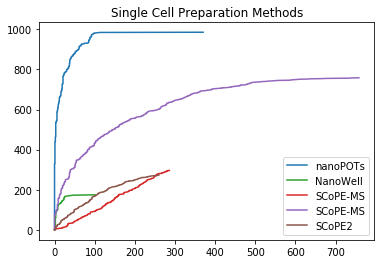

In [14]:
plt.title('Single Cell Preparation Methods')
plt.plot(nanoPOTs_raw.values(), nanoPOTs_raw.keys(), label="nanoPOTs")
plt.plot(0,0)#shift the automatic colors
plt.plot(NanoWell_3_raw.values(), NanoWell_3_raw.keys(), label="NanoWell")
plt.plot(SCoPE_MS_raw.values(), SCoPE_MS_raw.keys(), label="SCoPE-MS")
plt.plot(SCoPE_MS1_raw.values(), SCoPE_MS1_raw.keys(), label="SCoPE-MS")
plt.plot(SCoPE2_raw.values(), SCoPE2_raw.keys(), label="SCoPE2")
plt.legend(loc='lower right')
plt.show()

Here we see that while none of the methods detect more than a few hundred proteins in the negative control, most of them only detect a few hundred in the sample channel. The nanoPOTs method stands out with around a thousand proteins in this particular channel.

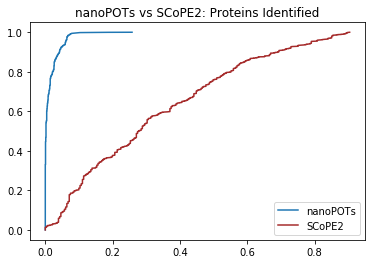

In [15]:
plt.title("nanoPOTs vs SCoPE2: Proteins Identified")
plt.plot(nanoPOTs.values(), nanoPOTs.keys(), label="nanoPOTs")
plt.plot(SCoPE2.values(), SCoPE2.keys(), label="SCoPE2", color='brown')
plt.legend(loc='lower right')
plt.show()